Hello and welcome to my presentation of the NBA player prediction project.

The goal of the program is to create a graph that shows all of the current players based on their stats and predicting their results for the current season.

First we have all the imports which we will go through as they come up in the project.

We start with the class PlayerStats which is an object of a player that, as its attributes has all the values present in the parameters. These are all the variables present in the "NBA player (year).csv" files.

In [ ]:
class PlayerStats(object):
    def __init__(self, rk, player, pos, age, team, g, gs, mp, fg, fga, fg_pct, three_p, three_pa, three_pct, two_p, two_pa, two_pct, efg_pct, ft, fta, ft_pct, orb, drb, trb, ast, stl, blk, tov, pf, pts):
        self.rk = rk
        self.player = player
        self.pos = pos
        self.age = age
        self.team = team
        self.g = g
        self.gs = gs
        self.mp = mp
        self.fg = fg
        self.fga = fga
        self.fg_pct = fg_pct
        self.three_p = three_p
        self.three_pa = three_pa
        self.three_pct = three_pct
        self.two_p = two_p
        self.two_pa = two_pa
        self.two_pct = two_pct
        self.efg_pct = efg_pct
        self.ft = ft
        self.fta = fta
        self.ft_pct = ft_pct
        self.orb = orb
        self.drb = drb
        self.trb = trb
        self.ast = ast
        self.stl = stl
        self.blk = blk
        self.tov = tov
        self.pf = pf
        self.pts = pts

    def update_stats(self, **kwargs):
        for key, value in kwargs.items():
            setattr(self, key, value)

#nothing special here, just basic implementation of an object and an update method (which could be used but is currently not in use)

Next we have the DataManager class which is initialized with a csv file and an empty player_stats list. It creates a list of all the players present in the given csv file and instatiates them as objects.

In [ ]:
class DataManager:
    def __init__(self, csv_file):
        self.csv_file = csv_file
        self.player_stats = []

    def load_data(self):
        data = pd.read_csv(self.csv_file)
        for _, row in data.iterrows():
            player = PlayerStats(
                rk=row['Rk'],
                player=row['Player'],
                pos=row['Pos'],
                age=row['Age'],
                team=row['Tm'],
                g=row['G'],
                gs=row['GS'],
                mp=row['MP'],
                fg=row['FG'],
                fga=row['FGA'],
                fg_pct=row['FG%'],
                three_p=row['3P'],
                three_pa=row['3PA'],
                three_pct=row['3P%'],
                two_p=row['2P'],
                two_pa=row['2PA'],
                two_pct=row['2P%'],
                efg_pct=row['eFG%'],
                ft=row['FT'],
                fta=row['FTA'],
                ft_pct=row['FT%'],
                orb=row['ORB'],
                drb=row['DRB'],
                trb=row['TRB'],
                ast=row['AST'],
                stl=row['STL'],
                blk=row['BLK'],
                tov=row['TOV'],
                pf=row['PF'],
                pts=row['PTS']
            )
            self.player_stats.append(player)

    def get_player_stats(self):
        return self.player_stats
    #used very often in the code to get the values of the player

    def update_player_stats(self, player, **kwargs):
        player.update_stats(**kwargs)
    #not currently used but it is always possible to change arguments of a player


Now comes the most important class of the whole project, basically the backbone, the GUI class. It spans lines 105-321 so we will divide covering this class into smaller parts. Here we go...

In [ ]:
#First step is initializing the class, we pass it root so that it can control exiting the application and datamanager so that it gets the proper data

class GUI:
    def __init__(self, root, data_manager):
        self.root = root
        self.data_manager = data_manager
        self.header_var = tk.StringVar()
        self.header_names = []

        self.fig_frame = tk.Frame(self.root)
        self.fig_frame.pack(side=tk.LEFT)
        #frame for graph, move it to the left

        self.create_scatter_plot()
        #create the graph

        self.button_frame = tk.Frame(self.root)
        self.button_frame.pack(side=tk.RIGHT)
        #frame for buttons move it to the right


        self.image_label = tk.Label(self.button_frame)
        self.image_label.pack(side=tk.TOP)
        #frame for image, move it above the buttons

        self.name_label()
        self.create_label()
        self.predicted_label()
        self.real_label()
        self.create_role_menu()
        self.create_date_menu()
        self.create_confirm_button()
        #instantiate all the components

        self.root.protocol("WM_DELETE_WINDOW", self.on_closing)
        #make the close button actually stop the program

        def on_closing(self):
            self.root.destroy()
            sys.exit()
        #it is a system exit so that it exits the project for sure


Let us skip the display_player_image for now and focus on the easier parts:

In [ ]:
    def name_label(self):
        self.name_var = tk.StringVar()
        self.name_var.set("Players name")
        label0 = tk.Label(self.button_frame, textvariable=self.name_var)
        label0.pack(side=tk.TOP)

    def create_label(self):
        self.label_var = tk.StringVar()
        self.label_var.set("This is where the player will be")
        label = tk.Label(self.button_frame, textvariable=self.label_var)
        label.pack(side=tk.TOP)

    def predicted_label(self):
        self.label_var2 = tk.StringVar()
        self.label_var2.set("Predicted player stats")
        label2 = tk.Label(self.button_frame, textvariable=self.label_var2)
        label2.pack(side=tk.TOP)

    def real_label(self):
        self.label_var3 = tk.StringVar()  
        self.label_var3.set("Difference or whatever (figure this part out)")
        label3 = tk.Label(self.button_frame, textvariable=self.label_var3)
        label3.pack(side=tk.TOP)

#all of these are just labels that are later meant to store the values of the player chosen, but for now they remain propagated with placeholder text

Now we can go back and explain how the image is added, but in order to do that we must first explain the helper functions that will be used in the function, and the first one from that is:

In [ ]:
# This function uses the googleapiclient library in order to create an api app that searches for an image in google and returns a url to that image

def search_images(query):
    #create service
    service = build('customsearch', 'v1', developerKey=api_key)

    #build query
    response = service.cse().list(
        cx=cx, #custom search enginge
        q=query, #form of service
        searchType='image', #image to get
        num=1 #amount of images
    ).execute()

    #url extractionn
    if 'items' in response:
        image_url = response['items'][0]['link']
        return image_url

    return None

Now that we have a function that allows us to query images from the web we need a function that specifies what exactly we want:

In [ ]:
#the query will follow search_images rules and search for player_name + basketball player online
def display_basketball_player_image(player_name):
    query = player_name + ' basketball player'
    image_url = search_images(query)

    return image_url
    #url of the extracted image

# player_name = "LeBron James"
# print(display_basketball_player_image(player_name))
# example code that prints the url of a picture of Lebron James

Knowing this we can finally go back to the original function:

In [ ]:
def display_player_image(self, player_name):
    image_url = display_basketball_player_image(player_name)
    #url for image is queried
        try:
            if image_url:
                response = requests.get(image_url)
                response.raise_for_status()
                image_data = response.content
                image = Image.open(io.BytesIO(image_data))
                image = image.resize((200, 200))
                photo = ImageTk.PhotoImage(image)
                #if found, image is opened to form and resized

                self.image_label.configure(image=photo)
                self.image_label.image = photo
                self.name_label.configure(text=player_name)
                #image is actually placed
            else:
                self.image_label.configure(image="")
                self.name_label.configure(
                    text=f"No image found for {player_name}")
                #blank image is show, with the text above
        except (requests.RequestException, UnidentifiedImageError) as e:
            self.image_label.configure(image="")
            self.name_label.configure(
                text=f"Error loading image for {player_name}")
            print(f"An error occurred while loading the image: {e}")

#Note: Error handling in this function is crutial for a multitude of reasons. Here are the possible problems that could happen:
#     1.There is no image online for a certain player_name
#     2.Image found online is in an incorrect format
#     3.Quota for maximum amount of querries has been passed and one cannot querry more pictures
# There are just some of the problems that can happen when using google api


Next is the create_scatter_plot(). 

In [ ]:
def create_scatter_plot(self):
    x = [float(player.pts)
         for player in self.data_manager.get_player_stats()]
    y = [float(player.g)
         for player in self.data_manager.get_player_stats()]
    #x and y will always start with the same values, points (pts) and games (g)

    self.fig_frame.destroy()
    self.fig_frame = tk.Frame(self.root)
    self.fig_frame.pack(side=tk.LEFT)
    # destroy old plot if exists

    fig = create_scatter_plot(
        x, y, self.data_manager.get_player_stats(), "PTS")
    #creating the actual scatter plot, look below for a more thourough explanation

    #creating a canvas
    canvas = FigureCanvasTkAgg(fig, master=self.fig_frame)
    canvas.draw()
    canvas.mpl_connect("pick_event", lambda event: self.on_plot_pick(
        event, canvas))  #here i incorporated a lamnda event to tie the on_plot_pick event to the canvas, meaning that pressing should result in the function activating
    canvas.get_tk_widget().pack()

    return canvas

As we omited the most crucial part of the above function the create_scatter_plot helper function. This creates the plot that is ultimately shown, it is a big function so lets split it into parts:

In [ ]:
def create_scatter_plot(x, y, data, selected_header):
    fig, ax = plt.subplots()
    scatter = ax.scatter(x, y)
    plt.xlabel(selected_header.upper())  #update x-axis label
    plt.ylabel("G")
    plt.title("NBA Player Scatter Plot")

    #create cursor that displays the name on hover
    cursor = mplcursors.cursor(hover=True)

    #set font to Arial, this is done to avoid warnings
    prop = font_manager.FontProperties(family='Arial')


Now come the interesting parts of the function the @cursor.connect part

In [ ]:
@cursor.connect("add")
   def on_hover(sel):
        index = sel.index
        player = data[index]

        name = player.player
        age = player.age
        g = player.g
        # gs = player.gs
        # mp = player.mp
        fg = player.fg
        fga = player.fga
        # fg_pct = player.fg_pct
        three_p = player.three_p
        three_pa = player.three_pa
        three_pct = player.three_pct
        # two_p = player.two_p
        # two_pa = player.two_pa
        # two_pct = player.two_pct
        # efg_pct = player.efg_pct
        ft = player.ft
        fta = player.fta
        # ft_pct = player.ft_pct
        # orb = player.orb
        # drb = player.drb
        trb = player.trb
        ast = player.ast
        stl = player.stl
        blk = player.blk
        tov = player.tov
        # pf = player.pf
        pts = player.pts

        sel.annotation.set_text(f"{name}, {age}")
        sel.annotation.set_fontproperties(prop)
        gui.name_var.set(f"{name}, {age}")
        gui.label_var.set(f"PTS: {pts}, G: {g}, FG: {fg}, FGA: {fga},   3P: {three_p}, 3PA: {three_pa}, 3P%: {three_pct}\n"
                          f"FT: {ft}, FTA: {fta}, TRB: {trb}, AST: {ast}, STL: {stl}, BLK: {blk}, TOV: {tov}")
#On hover a player is chose and his name gets passed to label_var which is the first label, it displays the current information stored in the actual csv file



        sus_player = get_sus_player(name)
        for row in sus_player:
            zg = row["G"]
            zpts = row["PTS"]
            ztrb = row["TRB"]
            zast = row["AST"]
            zstl = row["STL"]
            zblk = row["BLK"]
            ztov = row["TOV"]
            zfga = row["FGA"]
            zfg = row["FG"]
            zfta = row["FTA"]
            zft = row["FT"]
            zthree_pa = row["3PA"]
            zthree_p = row["3P"]
            zthree_pct = row["PER"]
        gui.label_var2.set(f"PTS: {zpts}, G: {zg}, FG: {zfg}, FGA: {zfga}, 3P: {zthree_p}, 3PA: {zthree_pa}, 3P%: {zthree_pct}\n"
                           f"FT: {zft}, FTA: {zfta}, TRB: {ztrb}, AST: {zast}, STL: {zstl}, BLK: {zblk}, TOV: {ztov}")
    
# the name of the player is passed to the get_sus_player function which predicts the players growth or decline, that function then return the player as an object and their arguments are displayed in label2

        dg = g - zg
        dpts = pts - zpts
        dtrb = trb - ztrb
        dast = ast - zast
        dstl = stl - zstl
        dblk = blk - zblk
        dtov = tov - ztov
        dfga = fga - zfga
        dfg = fg - zfg
        dfta = fta - zfta
        dft = ft - zft
        dthree_pa = three_pa - zthree_pa
        dthree_p = three_p - zthree_p
        dthree_pct = three_pct - zthree_pct
        gui.label_var3.set(f"PTS: {dpts:.2f}, G: {dg:.2f}, FG: {dfg:.2f}, FGA: {dfga:.2f}, 3P: {dthree_p:.2f}, 3PA: {dthree_pa:.2f}, 3P%: {dthree_pct:.2f}\n"
                           f"FT: {dft:.2f}, FTA: {dfta:.2f}, TRB: {dtrb:.2f}, AST: {dast:.2f}, STL: {dstl:.2f}, BLK: {dblk:.2f}, TOV: {dtov:.2f}")

#the third label is the difference between the actual player stats and the predicted payer stats, this shows how accurate the prediction algorithm is and the information is displayed in label 3


        gui.display_player_image(name)
#gui is updated so that it show the correct player image (if possible)

        gui.url.set(display_basketball_player_image(name))
#correct url is passed, changed due to player name

        allinfo = get_player_info(name)
        for row in allinfo:
            # print(x)
            pts = row["PTS"]
            g = row["G"]
            # print(f"Points: {pts}, Games: {g}")
#an unused function that gets the info from all files, based on a specific name, it can be changed to fit in different rows or all of them

    def on_click(event):
        if event.button == 1:
            index = event.index
            name = data[index].player
            gui.label_var.set(f"Selected player: {name}")

    fig.canvas.mpl_connect("button_press_event", on_click)
#unfrotunately on_click does not work as it should. The reason is still unclear to me, however i am sure that it is due to how the players are instantiated on the scatter graph

    return fig


As the final part of the scatter graph we have:

In [ ]:
def on_plot_pick(self, event, canvas):
    # Get the index of the selected player
    index = event.ind[0]
    player = self.data_manager.get_player_stats()[index]
    # Update the label with the player name
    self.label_var.set(f"Selected player: {player.player}")
    # Update the canvas to reflect the label change
    canvas.draw()
#this should work, hoewever the on_plot_pick has an underlying error as portrayed in the final part of the create_scatter_plot helper function

Now we add the role_menu and the date_menu. They both work in a simmilar way. They update the graph based on the chosen value, role_menu changes the atribute that is looked at per each game and date_menu changes the file from which we read the data.

In [ ]:
def create_role_menu(self):
        header_names = [
            'rk', 'age', 'g', 'gs', 'mp', 'fg', 'fga',
            'fg_pct', 'three_p', 'three_pa', 'three_pct', 'two_p', 'two_pa', 'two_pct', 'efg_pct',
            'ft', 'fta', 'ft_pct', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk',
            'tov', 'pf', 'pts'
        ]
        #options to choose from

        self.header_names = header_names
        self.header_var.set(header_names[0])
        option_menu = tk.OptionMenu(
            self.button_frame, self.header_var, *header_names)
        option_menu.pack(side=tk.TOP)

    def create_date_menu(self):
        dates = [
            '22/23', '21/22', '20/21'
        ]
        date_files = [
            'NBA player 2022-2023.csv', 'NBA player 2021-2022.csv', 'NBA player 2020-2021.csv'
        ]
        #options to choose from

        self.dates = dates
        self.dates_var = tk.StringVar()
        self.dates_var.set(dates[0])

        def on_date_select(*args):
            selected_date = self.dates_var.get()
            index = dates.index(selected_date)
            selected_file = date_files[index]
            self.data_manager = DataManager(selected_file)
            self.data_manager.load_data()
            self.update_plot()
            #updates the file that is used for the graph

        option_menu = tk.OptionMenu(
            self.button_frame, self.dates_var, *dates, command=on_date_select)
        option_menu.pack(side=tk.TOP)

    def create_confirm_button(self):
        confirm_button = tk.Button(
            self.button_frame, text="Confirm", command=self.update_plot)
        confirm_button.pack(side=tk.TOP)
        #confirm button is made for the role_menu in order to show that i can do both on choosing and on pressing a seperate button

Ofcourse this file would not be complete without update_plot():

In [ ]:
def update_plot(self):
    selected_header = self.header_var.get()

    x = [float(getattr(player, selected_header.lower()))
         for player in self.data_manager.get_player_stats()]
    y = [float(player.g)
         for player in self.data_manager.get_player_stats()]

    # Destroy the old plot if it exists
    self.fig_frame.destroy()
    self.fig_frame = tk.Frame(self.root)
    self.fig_frame.pack(side=tk.LEFT)

    fig = create_scatter_plot(
        x, y, self.data_manager.get_player_stats(), selected_header)

    # Create a canvas to display the plot
    canvas = FigureCanvasTkAgg(fig, master=self.fig_frame)
    canvas.draw()
    canvas.get_tk_widget().pack()
#this basically does the same as create but it does not create a canvas, only changes it

These are the helper functions that were mentioned previously but not explained properly.

In [ ]:
def get_player_info(player_name):
    csv_files = ['NBA player 2022-2023.csv',
                 'NBA player 2021-2022.csv', 'NBA player 2020-2021.csv']
    player_info = []

    for csv_file in csv_files:
        data = pd.read_csv(csv_file)
        matching_rows = data[data['Player'] == player_name]
        for _, row in matching_rows.iterrows():
            player_info.append(row)

    return player_info
#gets the info of a player from all the listed csv files and returns a list of players matching the name


def get_sus_player(player_name):
    player_info = []
    data = pd.read_csv('pure_efficiency_stats_22_23.csv')
    matching_rows = data[data['Player'] == player_name]
    for _, row in matching_rows.iterrows():
        player_info.append(row)

    # for x in player_info:
    #     print(x)
    return player_info
# gets the projected value of a player based on the output of the computation in the projection file (this can be found in "pure_efficiency_stats_22_23.csv")


And finally:

In [ ]:
if __name__ == "__main__":
    root = tk.Tk()
    data_manager = DataManager("NBA player 2022-2023.csv")
    data_manager.load_data()

    gui = GUI(root, data_manager)

    root.protocol("WM_DELETE_WINDOW", gui.on_closing)

    root.mainloop()
#main loop that runs the program

Now onto the documentation for the projection file

First and foremost, the following models were implemented and assessed:
- Random Forest Regression with Backward Elimination
- Linear Regression with Backward Elimination
- Random Forest Regression with Backward Elimination (sig. lvl = 0.1)
- Linear Regression with Backward Elimination (sig. lvl = 0.1)

Starting off with the first model
Random Forest Regression with Backward Elimination

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

Here is the data clean up process, the cleaned data is going to be used for all 4 models

A function is defined, taking in its arguments two files; input file and output file
The role the function plays is to clean up the initial data set of redundant variables (columns)
Then, a new column is added, 'PER' which calculates the efficiency of a player based on the following forumula:

PER = (PTS + TRB + AST + STL + BLK - Missed FGs - Missed FTs - TOV) / G

This value is then rounded to 2 dp, so that it matches the format of the rest of the file
The results are outputted to a separate file

In [2]:
def file_output_per(input_file, output_file):
    df = pd.read_csv(input_file)
    grouped_data = df.groupby('Player').sum()
    sorted_data = grouped_data.sort_values('Player').reset_index()
    rounded_data = sorted_data.round(2)

    per = rounded_data.loc[:,
          ['Player', 'Age', 'G', 'GS', 'MP', 'PTS', 'TRB', 'AST', 'STL',
           'BLK', 'TOV', 'FGA', 'FG', 'FTA', 'FT', '3PA', '3P', 'PF']]

    per['PER'] = ((per['PTS']
                 + per['TRB']
                 + per['AST']
                 + per['STL']
                 + per['BLK']
                 - (per['FGA'] - per['FG'])
                 - (per['FTA'] - per['FT'])
                 - per['TOV']) / per['G'])

    per['PER'] = per['PER'].round(2)
    per.to_csv(output_file, index=False)


file_output_per('NBA player 2020-2021.csv', 'pure_efficiency_stats_20_21.csv')
file_output_per('NBA player 2021-2022.csv', 'pure_efficiency_stats_21_22.csv')
file_output_per('NBA player 2022-2023.csv', 'pure_efficiency_stats_22_23.csv')

Another function is defined which filters the players, keeping only the players present in all 3 different data sets
It does so by taking the paths of said datasets as arguments of the function
Then a variable is instantiated, which keeps a record of the players present in all (the intersection of) 3 data sets
Then the datasets are filtered by keeping the players if they exist in the above mentioned set
Finally, the function returns 3 Dataframes which are then converted to the finalised csv data sets, which are going to be used for our models

In [15]:
def player_filter(data_set_1_path, data_set_2_path, data_set_3_path):

    df_1 = pd.read_csv(data_set_1_path)
    df_2 = pd.read_csv(data_set_2_path)
    df_3 = pd.read_csv(data_set_3_path)

    common_players = set(df_1['Player']).intersection(df_2['Player']).intersection(df_3['Player'])

    filtered_df_1 = df_1[df_1['Player'].isin(common_players)]
    filtered_df_2 = df_2[df_2['Player'].isin(common_players)]
    filtered_df_3 = df_3[df_3['Player'].isin(common_players)]

    return filtered_df_1, filtered_df_2, filtered_df_3


filtered_data_1, filtered_data_2, filtered_data_3 = player_filter\
    ('pure_efficiency_stats_20_21.csv', 'pure_efficiency_stats_21_22.csv', 'pure_efficiency_stats_22_23.csv')

filtered_data_1.to_csv('pure_efficiency_stats_20_21_filtered.csv', index=False)
filtered_data_2.to_csv('pure_efficiency_stats_21_22_filtered.csv', index=False)
filtered_data_3.to_csv('pure_efficiency_stats_22_23_filtered.csv', index=False)

Then we proceed by picking out the columns for the variables for the training data and test data

The correlation between X_train and y_train is visualized using a heatmap (from the seaborn and plt libraries)

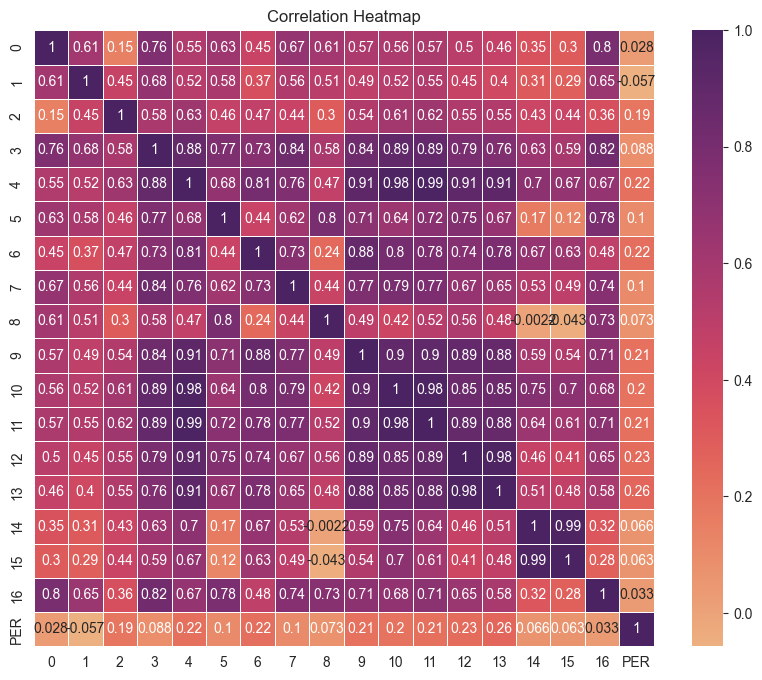

In [7]:
data_1 = pd.read_csv('pure_efficiency_stats_20_21_filtered.csv')
X_train = data_1.iloc[:, 1:-1].values

data_2 = pd.read_csv('pure_efficiency_stats_21_22_filtered.csv')
X_test = data_2.iloc[:, 1:-1].values
y_train = data_2.iloc[:, 18].values

df = pd.DataFrame(X_train)
df['PER'] = y_train

correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='flare', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Through this heatmap, we can visualise and better understand which of the variables at the given indices affect the PER rating the most

Before we start working with any of the models, we need to normalise the independent (X_train, X_test) variables

In [8]:
X_train = preprocessing.normalize(X_train)
X_test = preprocessing.normalize(X_test)

Now, we get to work on our first model: Random Forest Regression with Backward Elimination

We first define a function backward_elimination, to perform the backward elimination on the X_train and X_test, choosing the best possible independent variables to
pass to our model
The function takes three arguments: X, y and significance level (set to 0.05 for backward elimination)
The function defines a variable, selected_indices which indicates the index number of the selected feature
It does so, by checking the p_value of an independent variable, if the p_value > significance level, it is removed
Then, the function returns the remaining indices, qualifying as the indicies of the variables we are going to use as independent variables


the final variables we intend to use on our model are then instantiated, after the function is called to obtain the selected indices
For every row, select only the columns with indices listed in the selected_indices variable

In [9]:
def backward_elimination(X, y, significance_level=0.05):
    num_features = X.shape[1]
    selected_indices = np.arange(num_features)

    for i in range(num_features):
        model = sm.OLS(y, X).fit()
        max_p_value = max(model.pvalues)

        if max_p_value > significance_level:
            max_p_value_index = np.argmax(model.pvalues)
            X = np.delete(X, max_p_value_index, axis=1)
            selected_indices = np.delete(selected_indices, max_p_value_index)

        else:
            break
    return selected_indices


selected_variables = backward_elimination(X_train, y_train)

X_train_selected = X_train[:, selected_variables]
X_test_selected = X_test[:, selected_variables]

print(X_test_selected)
print()
print(X_test_selected)

[[0.22468671 0.64813474 0.27394495 0.02160449 0.09592394 0.03024629]
 [0.46844195 0.18737678 0.30417498 0.04809337 0.10118346 0.02998029]
 [0.3211512  0.63312665 0.26701428 0.03119754 0.07524114 0.03486784]
 ...
 [0.2764926  0.63325725 0.28630363 0.03478455 0.11238086 0.05440661]
 [0.43930324 0.13016392 0.27334424 0.02115164 0.10575819 0.0032541 ]
 [0.23732854 0.6115774  0.31674233 0.04107609 0.16156597 0.06480895]]

[[0.22468671 0.64813474 0.27394495 0.02160449 0.09592394 0.03024629]
 [0.46844195 0.18737678 0.30417498 0.04809337 0.10118346 0.02998029]
 [0.3211512  0.63312665 0.26701428 0.03119754 0.07524114 0.03486784]
 ...
 [0.2764926  0.63325725 0.28630363 0.03478455 0.11238086 0.05440661]
 [0.43930324 0.13016392 0.27334424 0.02115164 0.10575819 0.0032541 ]
 [0.23732854 0.6115774  0.31674233 0.04107609 0.16156597 0.06480895]]


A random forest regressor is then instantiated, train using the X_train and y_train data and then tested to make a prediciton based on X_test_selected

The r2 score of the model is then calculated based on the predicted values and the actual values and a scatter plot is plotted to show the distribution of prediciton
against the actual values

R2 Score = 0.36794 %


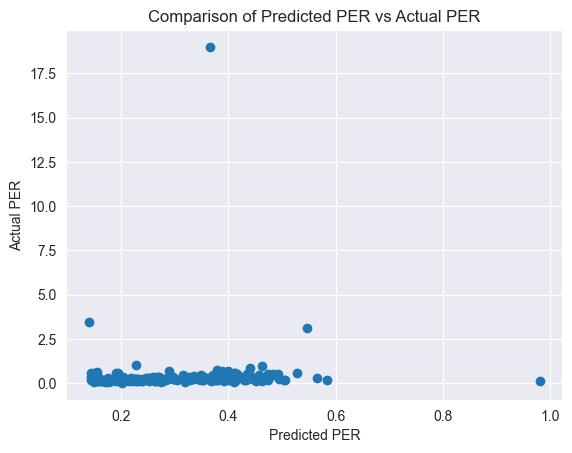

In [49]:
regressor_rf = RandomForestRegressor()

regressor_rf.fit(X_train_selected, y_train)

# setting an intercept for RF not std. approach
# introduces bias and changes behavior of RF
# regressor.estimators_[-1].tree_.value[0] = [[y_train.mean()]]

y_pred_m_1 = regressor_rf.predict(X_test_selected)

comp_data = pd.read_csv('pure_efficiency_stats_22_23_filtered.csv')
comp = comp_data['PER'].values

score_m_1 = r2_score(comp, y_pred_m_1) * 100
print('R2 Score =', score_m_1.round(5), '%')

plt.scatter(y_pred_m_1, comp)
plt.xlabel('Predicted PER')
plt.ylabel('Actual PER')
plt.title('Comparison of Predicted PER vs Actual PER')
plt.show()

Moving on to our second model, Linear Regression with Backward Elimination

Since the data is already preprocessed and normalised, we can now dive right into the working of the model

R2 Score = 0.47329 %


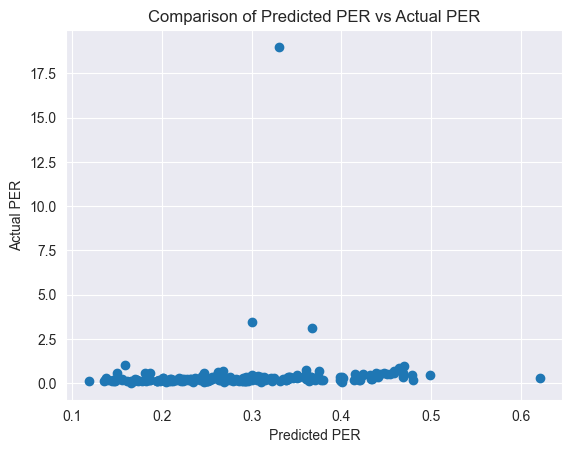

In [13]:
selected_variables_m_2 = backward_elimination(X_train, y_train)

X_train_selected_m_2 = X_train[:, selected_variables_m_2]
X_test_selected_m_2 = X_test[:, selected_variables_m_2]

regressor_lr = LinearRegression()

regressor_lr.fit(X_train_selected_m_2, y_train)

y_pred_m_2 = regressor_lr.predict(X_test_selected_m_2)

score_m_2 = r2_score(comp, y_pred_m_2) * 100
print('R2 Score =', score_m_2.round(5), '%')

plt.scatter(y_pred_m_2, comp)
plt.xlabel('Predicted PER')
plt.ylabel('Actual PER')
plt.title('Comparison of Predicted PER vs Actual PER')
plt.show()

df = pd.DataFrame({'Actual PER': comp, 'Predicted PER': y_pred_m_2, 'Difference': np.abs(comp - y_pred_m_2)})
df.to_csv('final_result_m_2.csv', index=False)

Moving forward into our models that work with backward elimination, with an adjusted significance level. This is going to be used
 for models 3 and 4

The function works exactly the same as for models 1 and 2, the only difference here is that the significance level is = 0.1 instead
which is greater than previously listed at 0.05.

This allows for a greater range of p_values, which in turn, allows more variables to be deemed as fit.

Thus, introducing new combinations of independent variables to the model. Contorary to the previous 2 models.

In [39]:
def backward_elimination_2(X, y, significance_level=0.1):
    num_features = X.shape[1]
    selected_indices = np.arange(num_features)

    for i in range(num_features):
        model = sm.OLS(y, X).fit()
        max_p_value = max(model.pvalues)

        if max_p_value > significance_level:
            max_p_value_index = np.argmax(model.pvalues)
            X = np.delete(X, max_p_value_index, axis=1)
            selected_indices = np.delete(selected_indices, max_p_value_index)

        else:
            break
    return selected_indices


selected_variables_m_3 = backward_elimination_2(X_train, y_train)

X_train_selected_m_3 = X_train[:, selected_variables_m_3]
X_test_selected_m_3 = X_test[:, selected_variables_m_3]

print(X_test_selected_m_3)
print()
print(X_test_selected_m_3)

[[0.22468671 0.64813474 0.27394495 0.02160449 0.09592394 0.03024629]
 [0.46844195 0.18737678 0.30417498 0.04809337 0.10118346 0.02998029]
 [0.3211512  0.63312665 0.26701428 0.03119754 0.07524114 0.03486784]
 ...
 [0.2764926  0.63325725 0.28630363 0.03478455 0.11238086 0.05440661]
 [0.43930324 0.13016392 0.27334424 0.02115164 0.10575819 0.0032541 ]
 [0.23732854 0.6115774  0.31674233 0.04107609 0.16156597 0.06480895]]

[[0.22468671 0.64813474 0.27394495 0.02160449 0.09592394 0.03024629]
 [0.46844195 0.18737678 0.30417498 0.04809337 0.10118346 0.02998029]
 [0.3211512  0.63312665 0.26701428 0.03119754 0.07524114 0.03486784]
 ...
 [0.2764926  0.63325725 0.28630363 0.03478455 0.11238086 0.05440661]
 [0.43930324 0.13016392 0.27334424 0.02115164 0.10575819 0.0032541 ]
 [0.23732854 0.6115774  0.31674233 0.04107609 0.16156597 0.06480895]]


Moving to model 3, Random Forest Regression with Backward Elimination, with significance level = 0.1

R2 Score = 0.12109 %


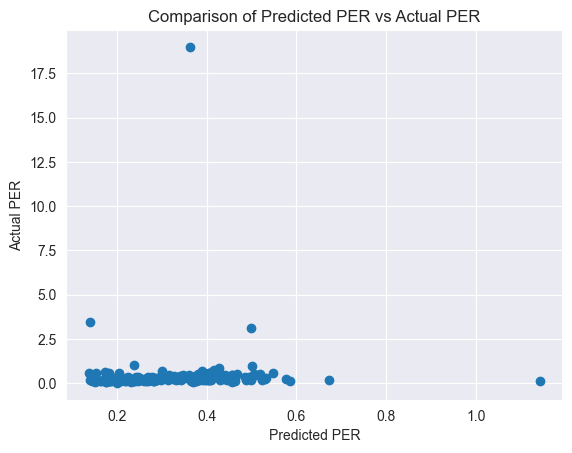

In [46]:
regressor_rf = RandomForestRegressor()

regressor_rf.fit(X_train_selected_m_3, y_train)

y_pred_m_3 = regressor_rf.predict(X_test_selected_m_3)

score_m_3 = r2_score(comp, y_pred_m_3) * 100
print('R2 Score =', score_m_3.round(5), '%')

plt.scatter(y_pred_m_3, comp)
plt.xlabel('Predicted PER')
plt.ylabel('Actual PER')
plt.title('Comparison of Predicted PER vs Actual PER')
plt.show()

Moving on to the last and final model, model 4. Linear Regression with Backward Elimination, adjusted to significance level 0.1

R2 Score = 0.47329 %


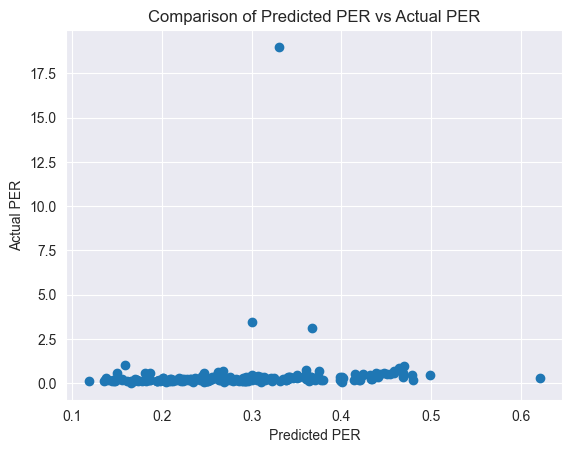

In [48]:
selected_variables_m_4 = backward_elimination_2(X_train, y_train)

X_train_selected_m_4 = X_train[:, selected_variables_m_4]
X_test_selected_m_4 = X_test[:, selected_variables_m_4]

regressor_lr = LinearRegression()

regressor_lr.fit(X_train_selected_m_4, y_train)

y_pred_m_4 = regressor_lr.predict(X_test_selected_m_4)

score_m_4 = r2_score(comp, y_pred_m_4) * 100
print('R2 Score =', score_m_4.round(5), '%')

plt.scatter(y_pred_m_4, comp)
plt.xlabel('Predicted PER')
plt.ylabel('Actual PER')
plt.title('Comparison of Predicted PER vs Actual PER')
plt.show()

Concluding points:

- Random Forest Regressors have an inconsistent r2_score
- Linear Regression has a consistent score.

- A negative r2_score indicates that a horizontal line fits better than proposed model. Thus, the best fit line skews to the left.

Prediciting the stats based off of the "best" model, i.e., model 2

Creating a file with three columns: True PER, Predicted PER and Difference (absolute)

In [29]:
df = pd.DataFrame({'Actual PER': comp, 'Predicited PER': y_pred_m_2, 'Difference': (comp - y_pred_m_2)})
df.to_csv('final_result_m_2.csv', index=False)

Reading the file created above with the latest filtered data set (22-23), multiplying each stat (starting from MP) by the
corresponding difference (so each predicted PER matches each player, since players are sorted alphabetically) and then replacing
the PER value in the last column with the predicted values from the second model

In [33]:
df_1 = pd.read_csv('pure_efficiency_stats_22_23_filtered.csv', header=0)
df_2 = pd.read_csv('final_result_m_2.csv', header=0)

df_1.iloc[:, 4:] = df_1.iloc[:, 4:] + df_1.iloc[:, 4:].multiply(df_2.iloc[:, -1], axis=0)

df_1.iloc[:, 4:] = df_1.iloc[:, 4:].round(2)

df_1.iloc[:, -1] = df_2.iloc[:, 1].round(2)

df_1.to_csv('m_2_predicted_player_stats_22_23.csv', index=0)

Thank you for your attention :)